In [71]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import yaml

In [72]:
with open(Path.cwd().parent / 'data' / 'interconnection_helpers.yaml', 'r') as f:
    interconnection_capacities = yaml.safe_load(f)

In [73]:
carrier = 'wind'

bmus = pd.read_csv(Path.cwd().parent / 'data' / 'prerun' / 'prepared_bmus.csv', index_col=0)
bmus

if carrier != 'interconnector':
    wind = bmus.loc[bmus.carrier.str.contains(carrier)].index
else:
    wind = pd.Index(list(interconnection_capacities['interconnection_mapper'].keys()))


In [89]:
df = pd.read_csv(Path.cwd().parent / 'summaries' / 'total_unit_dispatch_flex.csv', index_col=[0,1,2])

df.columns = pd.to_datetime(df.columns)
idx = pd.IndexSlice
df_redispatch = df.loc[idx[:, 'national', 'redispatch'], :].sum(axis=1)
df_wholesale = df.loc[idx[:, 'national', 'wholesale'], :].sum(axis=1)

df_wholesale.index = df_wholesale.index.get_level_values(0)
df_redispatch.index = df_redispatch.index.get_level_values(0)

total_wholesale = df_wholesale.loc[df_wholesale.index.intersection(wind)].sum()
total_redispatch = df_redispatch.loc[df_redispatch.index.intersection(wind)].sum()

diff_perc = (total_redispatch - total_wholesale) / total_wholesale
print(diff_perc)

diff_total = total_redispatch - total_wholesale
print(diff_total * 1e-6)


-0.06280475287306028
-12.748385156981795


In [ ]:
df = pd.read_csv(Path.cwd().parent / 'summaries' / 'total_unit_dispatch_flex.csv', index_col=[0,1,2])
df.columns = pd.to_datetime(df.columns)
df = df.loc[:, '2022':]

idx = pd.IndexSlice
df = df.loc[idx[:, :, 'redispatch'], :].sum(axis=1)
# df = df.loc[idx[:, :, 'wholesale'], :].sum(axis=1)

df

ABERU-1  national  redispatch    4.973656e+04
         zonal     redispatch    4.715086e+04
ABRBO-1  national  redispatch    8.341485e+05
         zonal     redispatch    8.341485e+05
ABRTW-1  national  redispatch    2.927463e+05
                                     ...     
JAMBB-1  zonal     redispatch    0.000000e+00
LITRB-1  national  redispatch    0.000000e+00
         zonal     redispatch    0.000000e+00
Viking   national  redispatch    3.533521e+06
         zonal     redispatch    3.862835e+06
Length: 844, dtype: float64

In [68]:
diff = df.loc[idx[:, 'national', :]] - df.loc[idx[:, 'zonal', :]]
diff.index = diff.index.get_level_values(0)

diff = diff.loc[diff.index.intersection(wind)].sort_values() * 1e-3

In [69]:
diff.sort_values()

IFA2       -879.387911
IFA1       -769.404690
Nemo       -765.685019
BritNed    -683.868801
ElecLink   -629.273848
NSL        -360.026029
Viking     -329.314409
dtype: float64

In [70]:
diff.sum()

-4416.960707257209

In [47]:

df.loc[idx[:, 'zonal', :]].sum() / df.loc[idx[:, 'national', :]].sum()

1.0014899208446046

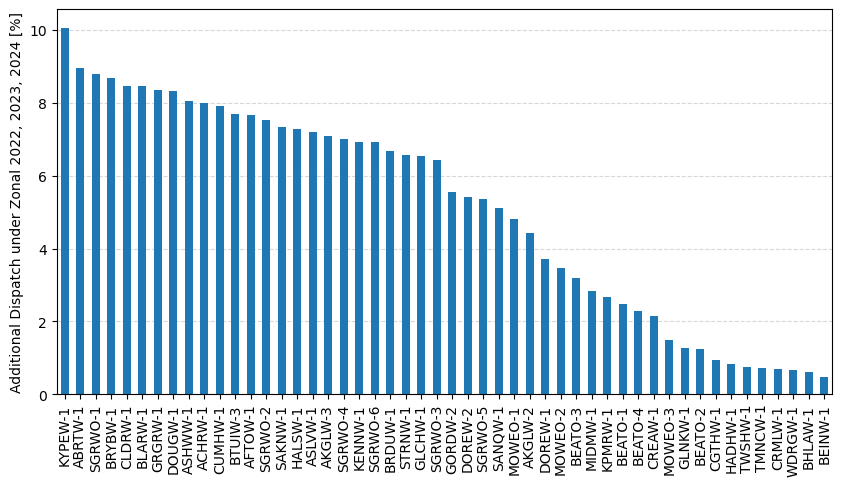

In [ ]:
hold = df.loc[idx[:, 'national', :]].mul(1e-3)
hold.index = hold.index.get_level_values(0)

fig, ax = plt.subplots(figsize=(10, 5))
diff.abs().div(hold.loc[diff.index]).sort_values(ascending=False).head(50).mul(100).plot.bar(ax=ax)

ax.set_ylabel('Additional Dispatch under Zonal 2022, 2023, 2024 [%]')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# plt.savefig('dispatch_increase_perc.pdf', bbox_inches='tight')

In [14]:
print('Total additional zonal dispatch in GWh')
abs(diff.sum())

Total additional zonal dispatch in GWh


1374.0082387986433

Total additional zonal dispatch in GWh per windfarms sorted in GWh


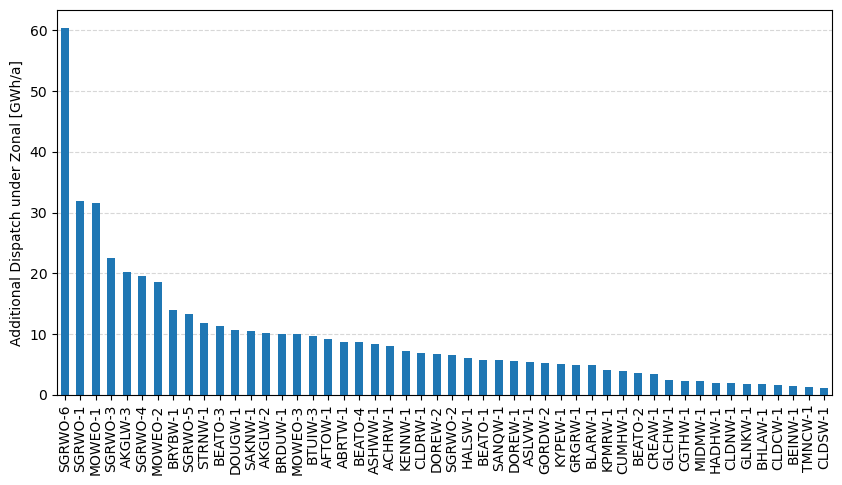

In [24]:
print('Total additional zonal dispatch in GWh per windfarms sorted in GWh')
fig, ax = plt.subplots(figsize=(10, 5))
# diff.groupby(diff.index.str[:5]).sum().sort_values().head(15).abs().plot.bar(ax=ax)
diff.sort_values().head(50).abs().mul(1/3).plot.bar(ax=ax)
# ax.set_ylabel('Additional zonal dispatch in GWh')
ax.set_ylabel('Additional Dispatch under Zonal [GWh/a]')

ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# plt.savefig('dispatch_increase_gwh.pdf', bbox_inches='tight')

In [7]:
print('Grouped to physical plants in GWh: SGRWO is Seagreen, MOWEO is Moray')
diff.groupby(diff.index.str[:5]).sum().sort_values().abs().head(20)

Grouped to physical plants in GWh: SGRWO is Seagreen, MOWEO is Moray


IFA2     879387.911076
IFA1     769404.689768
Nemo     765685.019284
BritN    683868.800938
ElecL    629273.847999
SGRWO    462409.045962
NSL      360026.028725
Vikin    329314.409467
SIZB-    235469.878293
MOWEO    180500.408338
AKGLW     91035.618096
BEATO     88926.998110
BRYBW     41770.930274
HINB-     39710.311154
DOREW     37154.915131
STRNW     35317.510267
DOUGW     31843.416795
SAKNW     31554.908254
BRDUW     30227.447266
BTUIW     29015.195385
dtype: float64

In [8]:
diff.groupby(diff.index.str[:5]).sum().sort_values().mul(80 * 1e3).abs().mul(1e-6).head(20)

IFA2     70351.032886
IFA1     61552.375181
Nemo     61254.801543
BritN    54709.504075
ElecL    50341.907840
SGRWO    36992.723677
NSL      28802.082298
Vikin    26345.152757
SIZB-    18837.590263
MOWEO    14440.032667
AKGLW     7282.849448
BEATO     7114.159849
BRYBW     3341.674422
HINB-     3176.824892
DOREW     2972.393211
STRNW     2825.400821
DOUGW     2547.473344
SAKNW     2524.392660
BRDUW     2418.195781
BTUIW     2321.215631
dtype: float64